In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re


plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


# 读取数据

In [3]:
df_job_list = pd.read_excel("job_list.xlsx")
df_job_description = pd.read_excel("job_description.xlsx")

# 合并数据

In [4]:
df = pd.concat([df_job_list,df_job_description],axis=1)

# 导出数据

In [5]:
df.to_excel('拉勾网搜索新媒体运营工作岗位信息（广州）.xlsx', index=False)

# 观察数据

In [6]:
df.head()

,job_title,job_id,location,date,salary,experience,education,company_name,industry,financing,size,benefits,advantage,job_detail,work_addr
0,新媒体运营,12115926,增城区,1天前发布,8k-15k,经验3-5年,大专,荣进集团,制造业,不需要融资,150-500人,"五险一金,全勤奖,绩效奖金","五险一金,全勤奖,绩效奖金",岗位职责：\n1、统筹规划欧圣德门窗公司终端新媒体线上专项培训，组织研究开发新媒体课程，有效...,广州 - 增城区- 新塘水南开发区一路1号广东欧圣德智能门窗实业有限公司
1,新媒体运营,12137524,白云区,1天前发布,8k-15k,经验3-5年,大专,中南机电,消费生活,不需要融资,50-150人,"五险一金,全勤奖,绩效奖金","五险一金,全勤奖,绩效奖金",岗位职责：\n1、负责企业自媒体平台（如微信公众号、微博、抖音、知乎等）的内容策划和投放，有...,广州 - 白云区- 白云大道北880号安华汇B馆5楼
2,新媒体运营（双休/大厂/赛道福利好）,12137853,天河区,1天前发布,8k-12k,经验1-3年,本科,广州市新东方无忧乐知咨询服务有限公司,教育｜培训,不需要融资,少于15人,"福利好,双休","福利好,双休",【岗位职责】\n1、负责短视频类平台账号的运营工作，包括内容选题、策划、拍摄、剪辑、发布、内...,广州 - 天河区- 新东方考研四六级专升本(天河·新天地店)
3,新媒体运营,11980246,天河区,1天前发布,7k-12k,经验3-5年,本科,皮尔卡丹,批发｜零售,不需要融资,150-500人,"五险一金,绩效奖金,员工旅游","五险一金,绩效奖金,员工旅游",岗位职责：\n1、负责品牌自媒体平台（公众号、微博、小红书、视频号等）的整体运营，包括内容运...,广州 - 天河区- 体育西路109号高盛大厦6楼
4,新媒体运营,11926550,南沙区,1天前发布,8k-16k,经验1-3年,大专,福报科技,能源｜矿产｜环保,不需要融资,50-150人,"社保,提成奖金,专业培训","社保,提成奖金,专业培训",公司介绍：\n广州市福报环保科技有限公司，主营：各类环保相关项目、设备生产、环境在线监测等业...,广州 - 南沙区- 永固加工园-D栋5楼


# 数据处理

In [7]:
# 定义一个函数来提取薪资范围的底线和上限
def extract_salary_range(salary_range):
    # 使用正则表达式提取数字部分
    match = re.match(r'(\d+)k-(\d+)k', salary_range)
    if match:
        # 提取并返回底线和上限的数值
        return int(match.group(1)), int(match.group(2))
    return None, None

# 使用 apply() 函数应用该提取函数
df[['salary_floor', 'salary_ceiling']] = df['salary'].apply(lambda x: pd.Series(extract_salary_range(x)))


In [8]:

df[['salary_floor', 'salary_ceiling']]


,salary_floor,salary_ceiling
0,8,15
1,8,15
2,8,12
3,7,12
4,8,16
...,...,...
445,7,11
446,1,2
447,8,10
448,6,10


# 单变量分析

## 数值变量

In [9]:
df["salary_floor"].describe()

count    450.000000
mean       6.664444
std        3.104825
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       30.000000
Name: salary_floor, dtype: float64

## 类别变量

In [14]:
df[["size"]].value_counts()

size     
50-150人      114
15-50人       104
150-500人      77
少于15人         50
500-2000人     44
2000人以上        2
Name: count, dtype: int64

In [15]:
table = df[["size"]].value_counts()

<Axes: ylabel='count'>

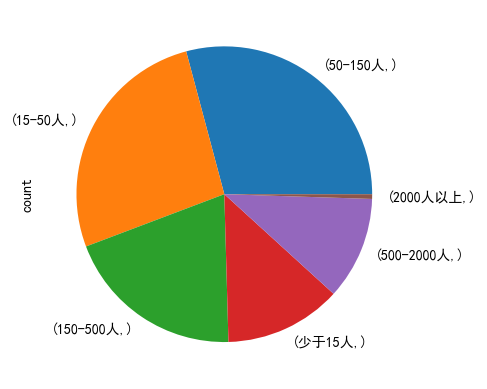

In [16]:
table.plot.pie()

In [13]:
df[["location"]].value_counts()

location
天河区         104
番禺区          72
白云区          54
海珠区          39
黄埔区          31
越秀区          22
增城区          18
南沙区          15
花都区          12
荔湾区           8
五山            7
珠江新城          5
新港            5
东圃            4
建设            4
官洲            3
白云大道          3
琶洲            3
从化区           3
石井            2
花地湾           2
洛溪            2
沙湾            2
黄阁            2
东风东           2
市桥            2
大石            2
东湖            1
前进            1
长兴            1
钟村            1
车陂            1
五羊新城          1
赤岗            1
元岗            1
农林下路          1
花山            1
南岗            1
祈福            1
水荫            1
南洲            1
南浦            1
天园            1
岭南            1
淘金            1
广州            1
新塘            1
沙河            1
棠景            1
Name: count, dtype: int64

In [17]:
df[["education"]].value_counts()

education
大专           206
本科           146
不限            56
应届 / 本科       20
应届 / 大专       17
应届 / 不限        4
硕士             1
Name: count, dtype: int64

In [20]:
df[["experience"]].value_counts()

experience
经验1-3年        222
经验3-5年         98
经验不限           68
经验在校           41
经验5-10年        18
经验1年以下          3
Name: count, dtype: int64

In [19]:
df[["date"]].value_counts()

date      
3天前发布         44
1天前发布         41
2024-12-16    30
2024-12-17    27
2天前发布         21
              ..
2023-07-29     1
2023-07-18     1
2023-07-14     1
2023-06-16     1
2024-04-26     1
Name: count, Length: 157, dtype: int64